In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"/kaggle/input/test-file/tested.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df.shape

(418, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Age is normally distributed
# 20% of the values are  missing 
# there are some outliers

In [7]:
df["Age"].describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

<Axes: ylabel='Density'>

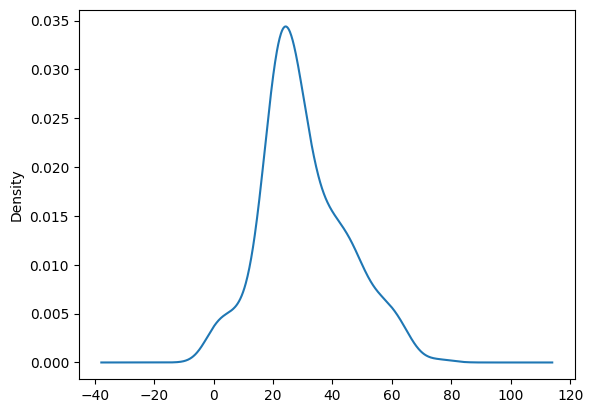

In [8]:
df["Age"].plot(kind = "kde")

In [9]:
df["Age"].skew()

0.4573612871503845

<Axes: xlabel='Age'>

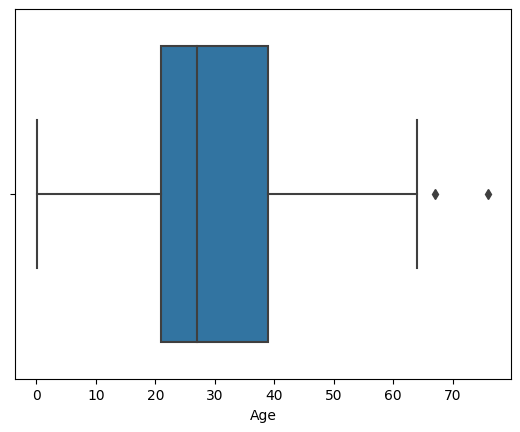

In [10]:
sns.boxplot(x = "Age", data = df)

In [11]:
df["Age"].isnull().sum()/len(df["Age"])

0.20574162679425836

In [12]:
df["Age"].fillna(df["Age"].median(), inplace=True)

# Fare
conclusion
> .The data is highly(positively)skewed

> .Fare col actually contains  the group fare and  not the individual fare(This migth be and issue )

> .We need to create a new col called individual fare

In [13]:
df["Fare"].describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

<Axes: ylabel='Frequency'>

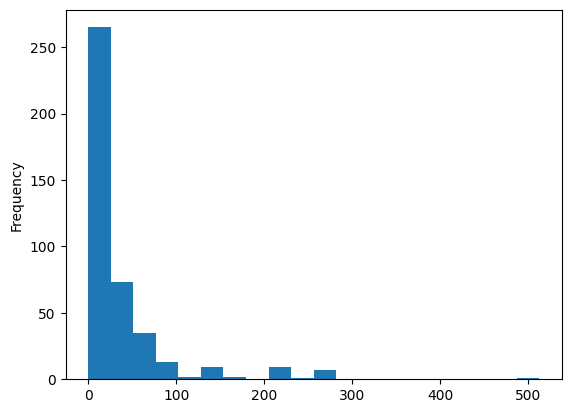

In [14]:
df["Fare"].plot(kind = "hist",bins = 20)

<Axes: ylabel='Density'>

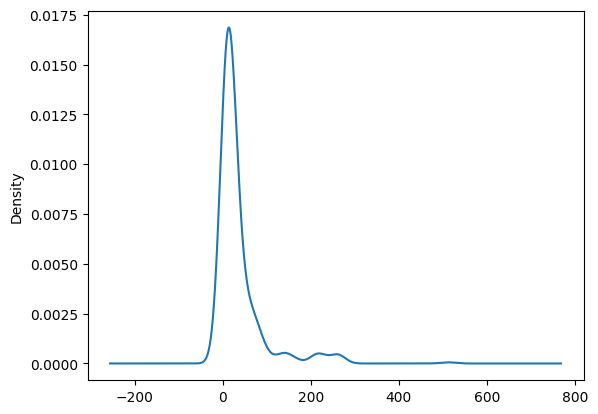

In [15]:
df["Fare"].plot(kind = "kde")

In [16]:
df["Fare"].skew()

3.6872133081121405

<Axes: xlabel='Fare'>

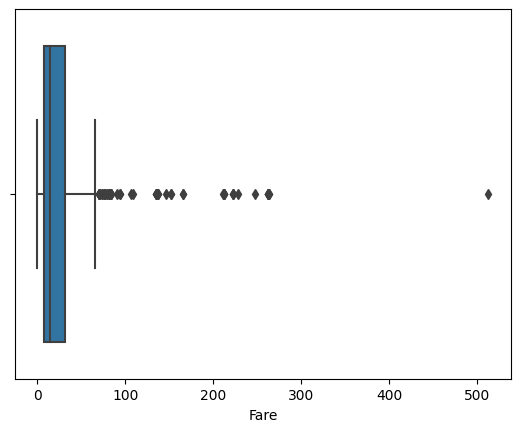

In [17]:
sns.boxplot(x = "Fare",data = df)

In [18]:
df[df["Fare"] >100]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
24,916,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
53,945,1,1,"Fortune, Miss. Ethel Flora",female,28.0,3,2,19950,263.0000,C23 C25 C27,S
59,951,1,1,"Chaudanson, Miss. Victorine",female,36.0,0,0,PC 17608,262.3750,B61,C
64,956,0,1,"Ryerson, Master. John Borie",male,13.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
69,961,1,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.0,1,4,19950,263.0000,C23 C25 C27,S
74,966,1,1,"Geiger, Miss. Amalie",female,35.0,0,0,113503,211.5000,C130,C
75,967,0,1,"Keeping, Mr. Edwin",male,32.5,0,0,113503,211.5000,C132,C
81,973,0,1,"Straus, Mr. Isidor",male,67.0,1,0,PC 17483,221.7792,C55 C57,S
114,1006,1,1,"Straus, Mrs. Isidor (Rosalie Ida Blun)",female,63.0,1,0,PC 17483,221.7792,C55 C57,S
141,1033,1,1,"Daniels, Miss. Sarah",female,33.0,0,0,113781,151.5500,NaN,S


In [19]:
df["Fare"].isnull().sum()

1

In [20]:
df["Fare"].fillna(df["Fare"].median(),inplace = True)

In [21]:
df["Fare"].isnull().sum()

0

## Survived
> Conclusions

> Most people do not survive

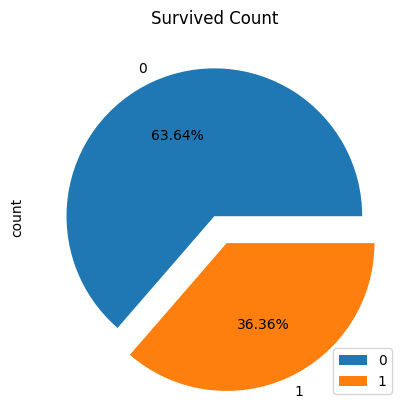

In [22]:
ax = [0.0,0.2]
df["Survived"].value_counts().plot(kind = "pie",autopct = "%1.2f%%",explode=ax)
plt.legend(loc = 4)
plt.title("Survived Count")
plt.show()


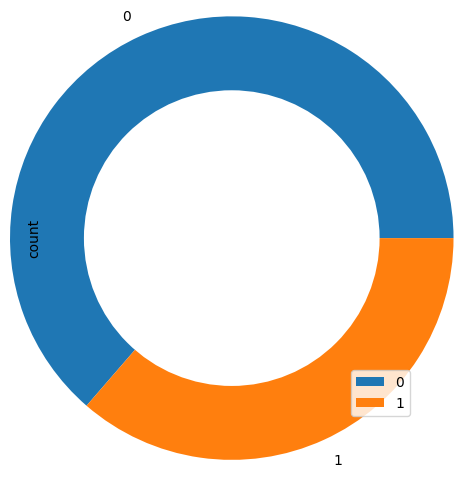

In [23]:

df["Survived"].value_counts().plot(kind = "pie",radius=1.5)
cr = plt.Circle(xy = (0,0),radius = 1, facecolor = "w")
plt.gca().add_artist(cr)
plt.legend(loc = 4)
# plt.title("Survived Count")
plt.show()

In [24]:
df["Survived"].isnull().sum()

0

# Plclass
> Conclusions

> Surprisingly less people  travel in Pclass 2 and more people travel in Pclass 1

In [25]:
df["Pclass"].value_counts()

Pclass
3    218
1    107
2     93
Name: count, dtype: int64

Text(0.5, 1.0, 'Pclass Count')

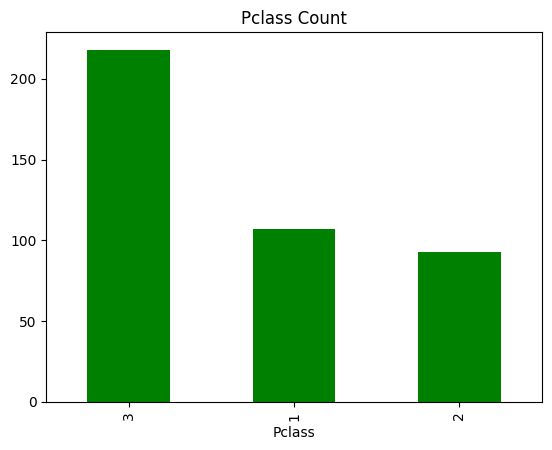

In [26]:
df["Pclass"].value_counts().plot(kind = "bar",color = "green")
plt.title("Pclass Count")

Text(0.5, 1.0, 'Pclass Count')

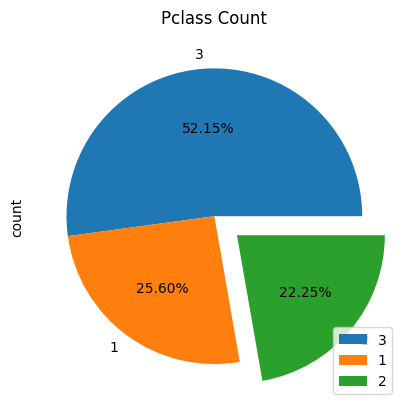

In [27]:
ax = [0.0,0.0,0.2]
df["Pclass"].value_counts().plot(kind = "pie",autopct = "%1.2f%%",explode=ax)
plt.legend(loc = 4)
plt.title("Pclass Count")

# Most travelers are Male

<Axes: xlabel='Sex'>

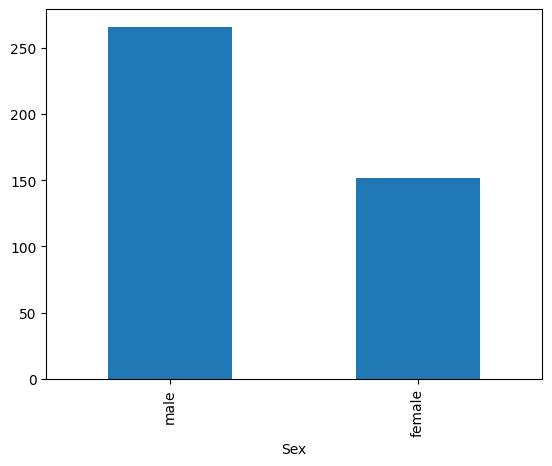

In [28]:
df['Sex'].value_counts().plot(kind = "bar")

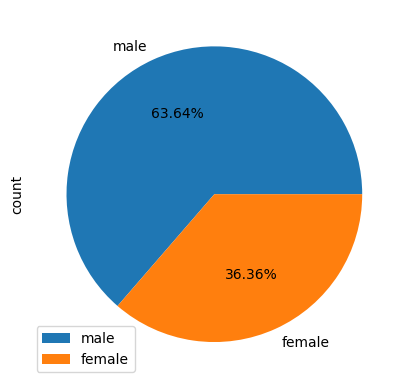

In [29]:
df['Sex'].value_counts().plot(kind = "pie",autopct = "%1.2f%%")
plt.legend(loc = 3)

In [30]:
df["Sex"].isnull().sum()

0

# Most people travel alone.

In [31]:
df["SibSp"].value_counts()

SibSp
0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: count, dtype: int64

Text(0.5, 1.0, 'SibSp Count')

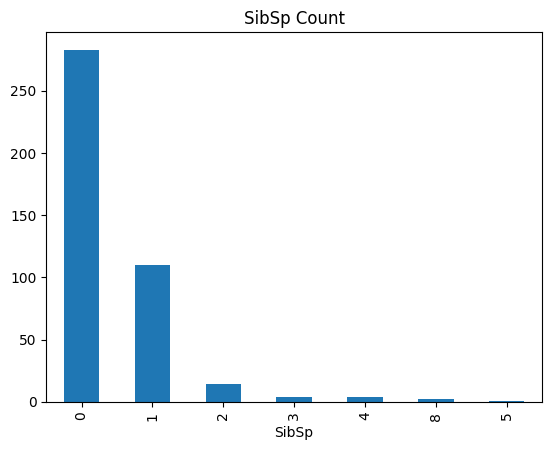

In [32]:
df["SibSp"].value_counts().plot(kind = "bar")
plt.title("SibSp Count")

<Axes: ylabel='count'>

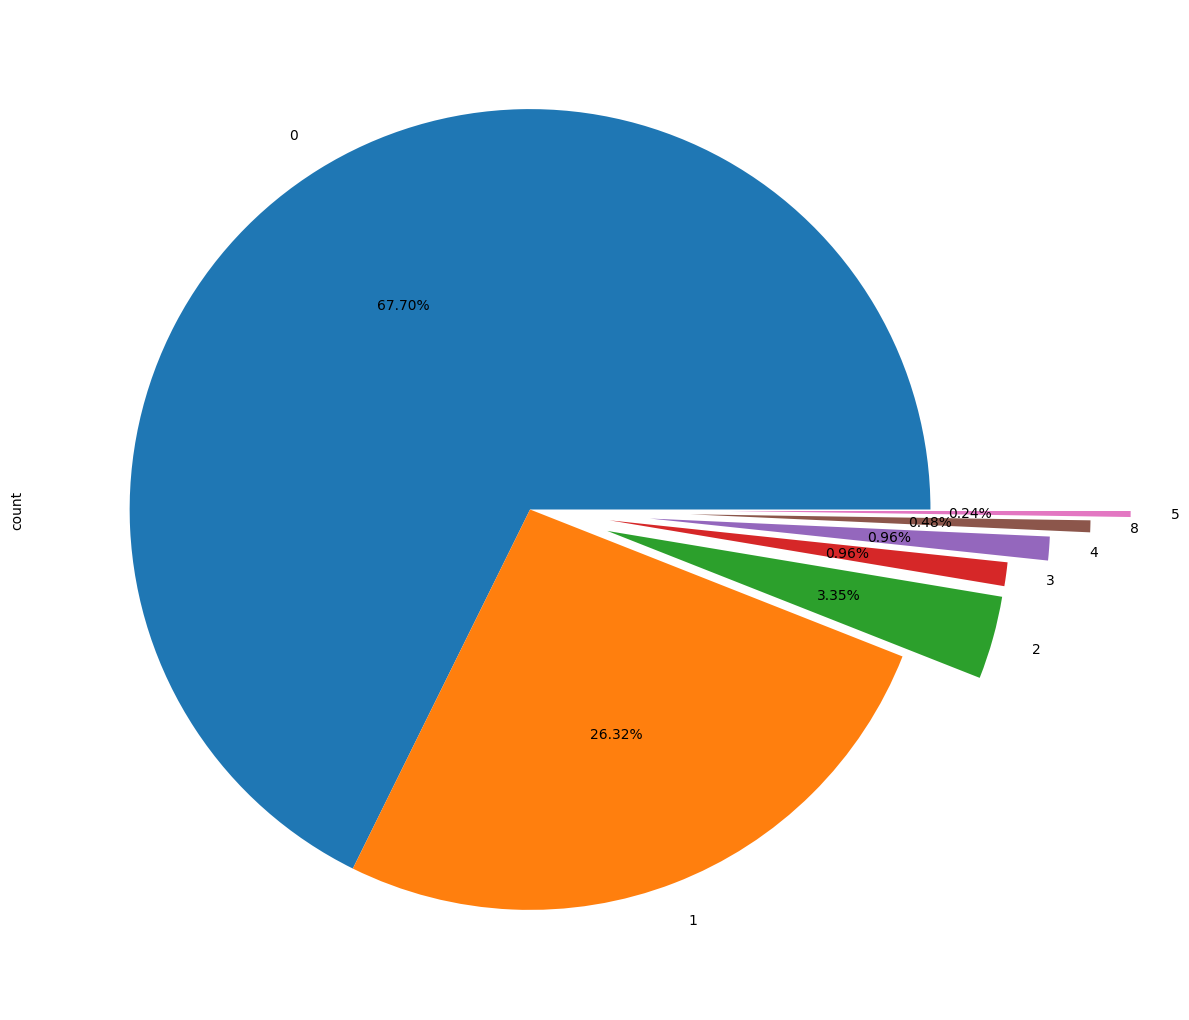

In [33]:
ax = [0.0,0.0,0.2,0.2,0.3,0.4,0.5]
plt.figure(figsize = (15,13))
df["SibSp"].value_counts().plot(kind = "pie",autopct = "%1.2f%%",explode=ax)

In [34]:
df["SibSp"].isnull().sum()

0

# Parch and SibSp col can be merged to from  a new col call family_size
# Create a new col called is_alone

In [35]:
df["Parch"].value_counts()

Parch
0    324
1     52
2     33
3      3
4      2
9      2
6      1
5      1
Name: count, dtype: int64

<Axes: xlabel='Parch'>

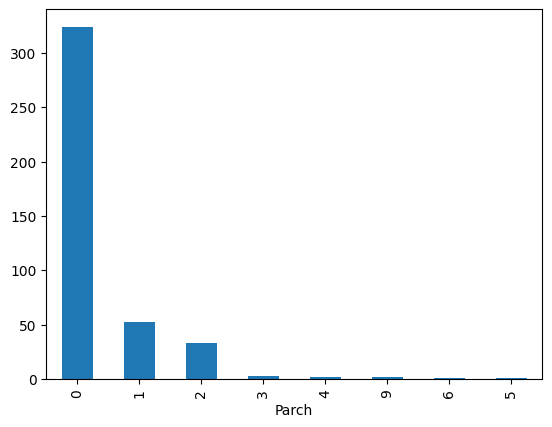

In [36]:
df["Parch"].value_counts().plot(kind = "bar")

<Axes: ylabel='count'>

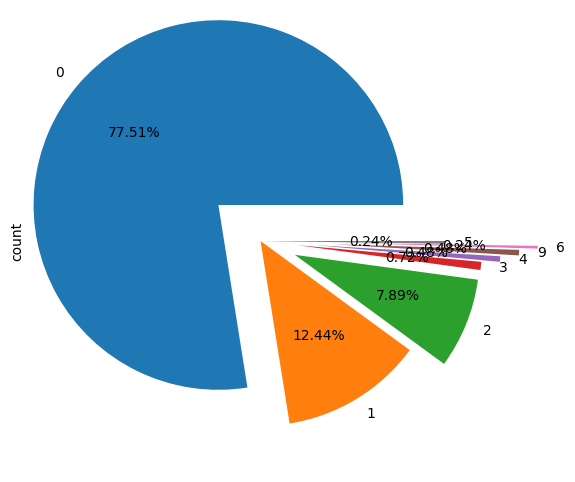

In [37]:
plt.figure(figsize = (8,6))
ax = [0.3,0.0,0.2,0.2,0.3,0.4,0.5,0.0]
df["Parch"].value_counts().plot(kind = "pie",autopct = "%1.2f%%",explode=ax)

In [38]:
df["Embarked"].value_counts()

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

<Axes: xlabel='Embarked'>

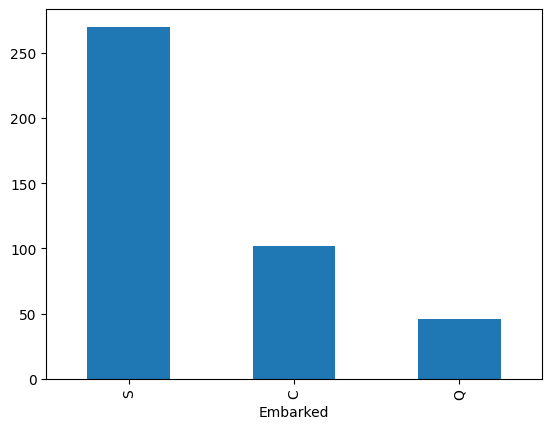

In [39]:
df["Embarked"].value_counts().plot(kind = "bar")

<Axes: ylabel='count'>

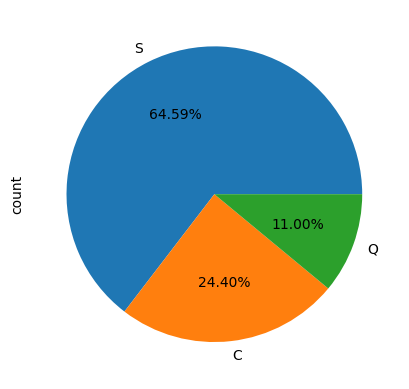

In [40]:
df["Embarked"].value_counts().plot(kind = "pie",autopct = "%1.2f%%")

In [41]:
pd.crosstab(df["Survived"],df["Pclass"],normalize = "columns")*100

Pclass,1,2,3
Survived,,,
0,53.271028,67.741935,66.972477
1,46.728972,32.258065,33.027523


<Axes: xlabel='Pclass', ylabel='Survived'>

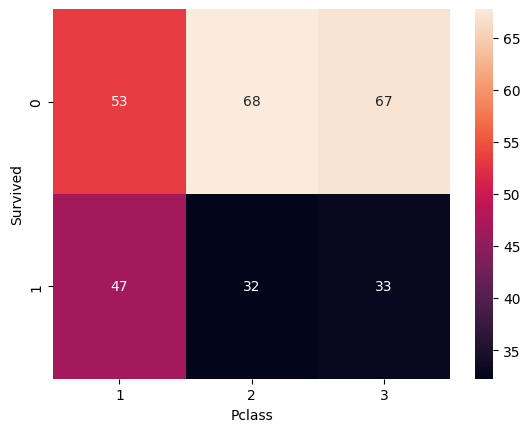

In [42]:
sns.heatmap(pd.crosstab(df["Survived"],df["Pclass"],normalize = "columns")*100,annot=True)

In [43]:
pd.crosstab(df["Survived"],df["Sex"],normalize = "columns")*100

Sex,female,male
Survived,,
0,0.0,100.0
1,100.0,0.0


In [44]:
pd.crosstab(df["Survived"],df["Embarked"],normalize = "columns")*100

Embarked,C,Q,S
Survived,,,
0,60.784314,47.826087,67.407407
1,39.215686,52.173913,32.592593


In [45]:
pd.crosstab(df["Sex"],df["Embarked"],normalize = "columns")*100

Embarked,C,Q,S
Sex,,,
female,39.215686,52.173913,32.592593
male,60.784314,47.826087,67.407407


In [46]:
pd.crosstab(df["Pclass"],df["Embarked"],normalize = "columns")*100

Embarked,C,Q,S
Pclass,,,
1,54.901961,2.173913,18.518519
2,10.784314,8.695652,28.888889
3,34.313725,89.130435,52.592593


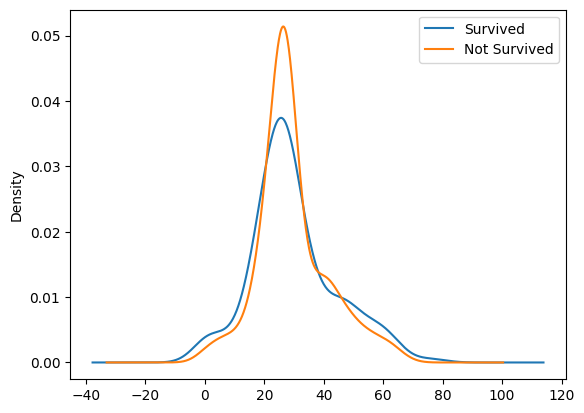

In [47]:
df[df["Survived"] == 1 ]["Age"].plot(kind = "kde",label="Survived")
df[df["Survived"] == 0 ]["Age"].plot(kind = "kde",label="Not Survived")
plt.legend()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


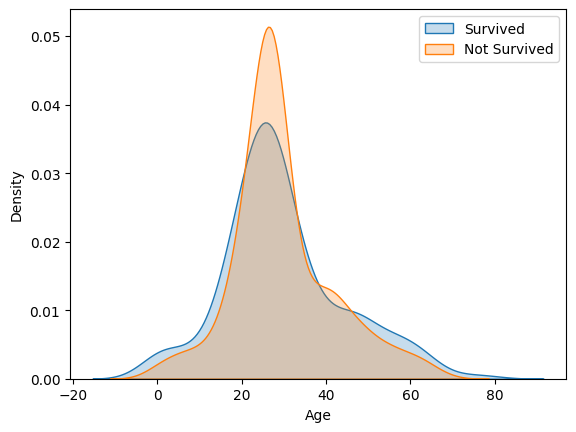

In [48]:
import seaborn as sns

sns.kdeplot(df[df["Survived"] == 1]["Age"], label="Survived", fill=True)
sns.kdeplot(df[df["Survived"] == 0]["Age"], label="Not Survived", fill=True)
plt.legend()
plt.show()


In [49]:
df[df["Pclass"] == 1]["Age"].median()

39.0

In [50]:
df[df["Pclass"] == 2]["Age"].median()

27.0

In [51]:
df[df["Pclass"] == 3]["Age"].median()

27.0

In [52]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Ferture Engineering on Fare col

In [53]:
df["SibSp"].value_counts()

SibSp
0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: count, dtype: int64

In [54]:
df[df["SibSp"] == 8]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
188,1080,1,3,"Sage, Miss. Ada",female,27.0,8,2,CA. 2343,69.55,NaN,S
360,1252,0,3,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.55,NaN,S


In [55]:
df["Ticket"].value_counts()

Ticket
PC 17608    5
CA. 2343    4
113503      4
PC 17483    3
220845      3
           ..
349226      1
2621        1
4133        1
113780      1
2668        1
Name: count, Length: 363, dtype: int64

In [56]:
df[df["Ticket"] == "CA. 2343"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
188,1080,1,3,"Sage, Miss. Ada",female,27.0,8,2,CA. 2343,69.55,NaN,S
342,1234,0,3,"Sage, Mr. John George",male,27.0,1,9,CA. 2343,69.55,NaN,S
360,1252,0,3,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.55,NaN,S
365,1257,1,3,"Sage, Mrs. John (Annie Bullen)",female,27.0,1,9,CA. 2343,69.55,NaN,S


In [57]:
df["individual_fare"] = df["Fare"]/(df["SibSp"] + df["Parch"] + 1)

<Axes: >

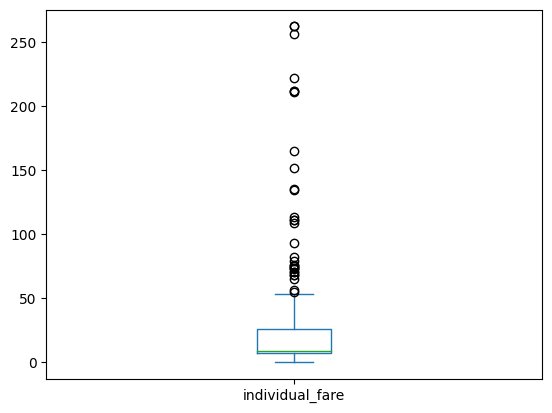

In [58]:
df["individual_fare"].plot(kind = "box")

In [59]:
df[["individual_fare","Fare"]].describe()

,individual_fare,Fare
count,418.000000,418.000000
mean,21.786577,35.576535
std,35.598822,55.850103
min,0.000000,0.000000
25%,7.634400,7.895800
50%,8.662500,14.454200
75%,25.982813,31.471875
max,262.375000,512.329200


In [60]:
df["family_size"] = df["SibSp"] + df["Parch"] + 1

In [61]:
def transform(num):
    if num == 1 :
        return "alone"
    elif num >1 and num <5:
        return "small"
    else:
        return "large"

In [62]:
df["family_type"] = df["family_size"].apply(transform)

In [63]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,individual_fare,family_size,family_type
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,7.829200,1,alone
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,3.500000,2,small
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,9.687500,1,alone
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,8.662500,1,alone
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,4.095833,3,small


In [64]:
pd.crosstab(df["Survived"],df["family_type"],normalize = "columns")*100

family_type,alone,large,small
Survived,,,
0,73.12253,60.0,47.586207
1,26.87747,40.0,52.413793


<Axes: xlabel='family_type', ylabel='Survived'>

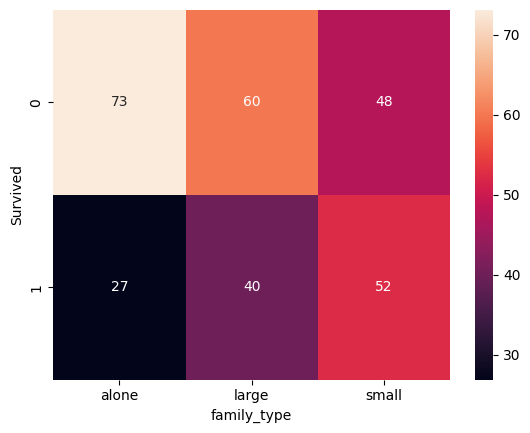

In [65]:
sns.heatmap(pd.crosstab(df["Survived"],df["family_type"],normalize = "columns")*100,annot=True)

In [66]:
df["surname"] = df["Name"].str.split(",").str.get(0)

In [67]:
df["title"] = df["Name"].str.split(",").str.get(1).str.strip().str.split(" ").str.get(0)

In [68]:
df["title"].value_counts()

title
Mr.        240
Miss.       78
Mrs.        72
Master.     21
Col.         2
Rev.         2
Ms.          1
Dr.          1
Dona.        1
Name: count, dtype: int64

In [69]:
df["Cabin"].fillna("M",inplace = True)

/tmp/ipykernel_17/889150495.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Cabin"].fillna("M",inplace = True)


In [70]:
df["Cabin"].value_counts()

Cabin
M                  327
B57 B59 B63 B66      3
C89                  2
C116                 2
C80                  2
                  ... 
E45                  1
E52                  1
B58 B60              1
C62 C64              1
C105                 1
Name: count, Length: 77, dtype: int64

In [71]:
df["deck"] = df["Cabin"].str[0]

In [72]:
df["deck"].value_counts()

deck
M    327
C     35
B     18
D     13
E      9
F      8
A      7
G      1
Name: count, dtype: int64

In [73]:
pd.crosstab(df["deck"],df["Pclass"])

Pclass,1,2,3
deck,,,
A,7,0,0
B,18,0,0
C,35,0,0
D,11,2,0
E,9,0,0
F,0,5,3
G,0,0,1
M,27,86,214


In [74]:
pd.crosstab(df["Survived"],df["deck"],normalize = "columns")

deck,A,B,C,D,E,F,G,M
Survived,,,,,,,,
0,0.571429,0.5,0.457143,0.615385,0.555556,0.625,0.0,0.669725
1,0.428571,0.5,0.542857,0.384615,0.444444,0.375,1.0,0.330275


<Axes: xlabel='deck'>

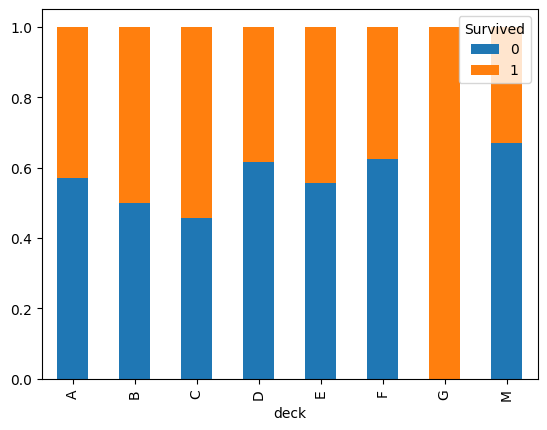

In [75]:
pd.crosstab(df["deck"],df["Survived"],normalize = "index").plot(kind = "bar",stacked = True)

<Axes: >

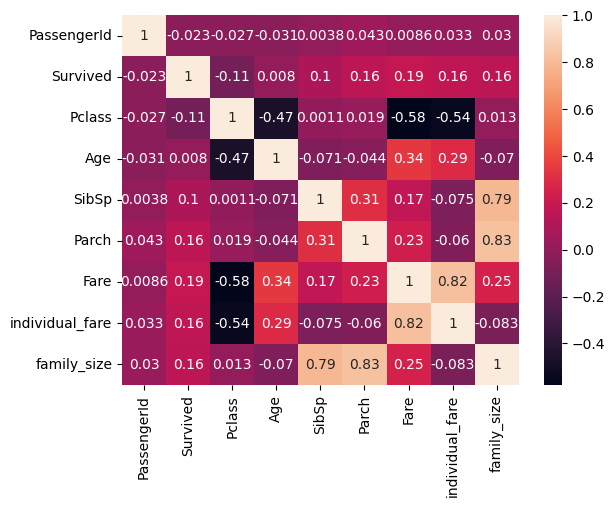

In [76]:
sns.heatmap(df.select_dtypes(include='number').corr(),annot = True)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

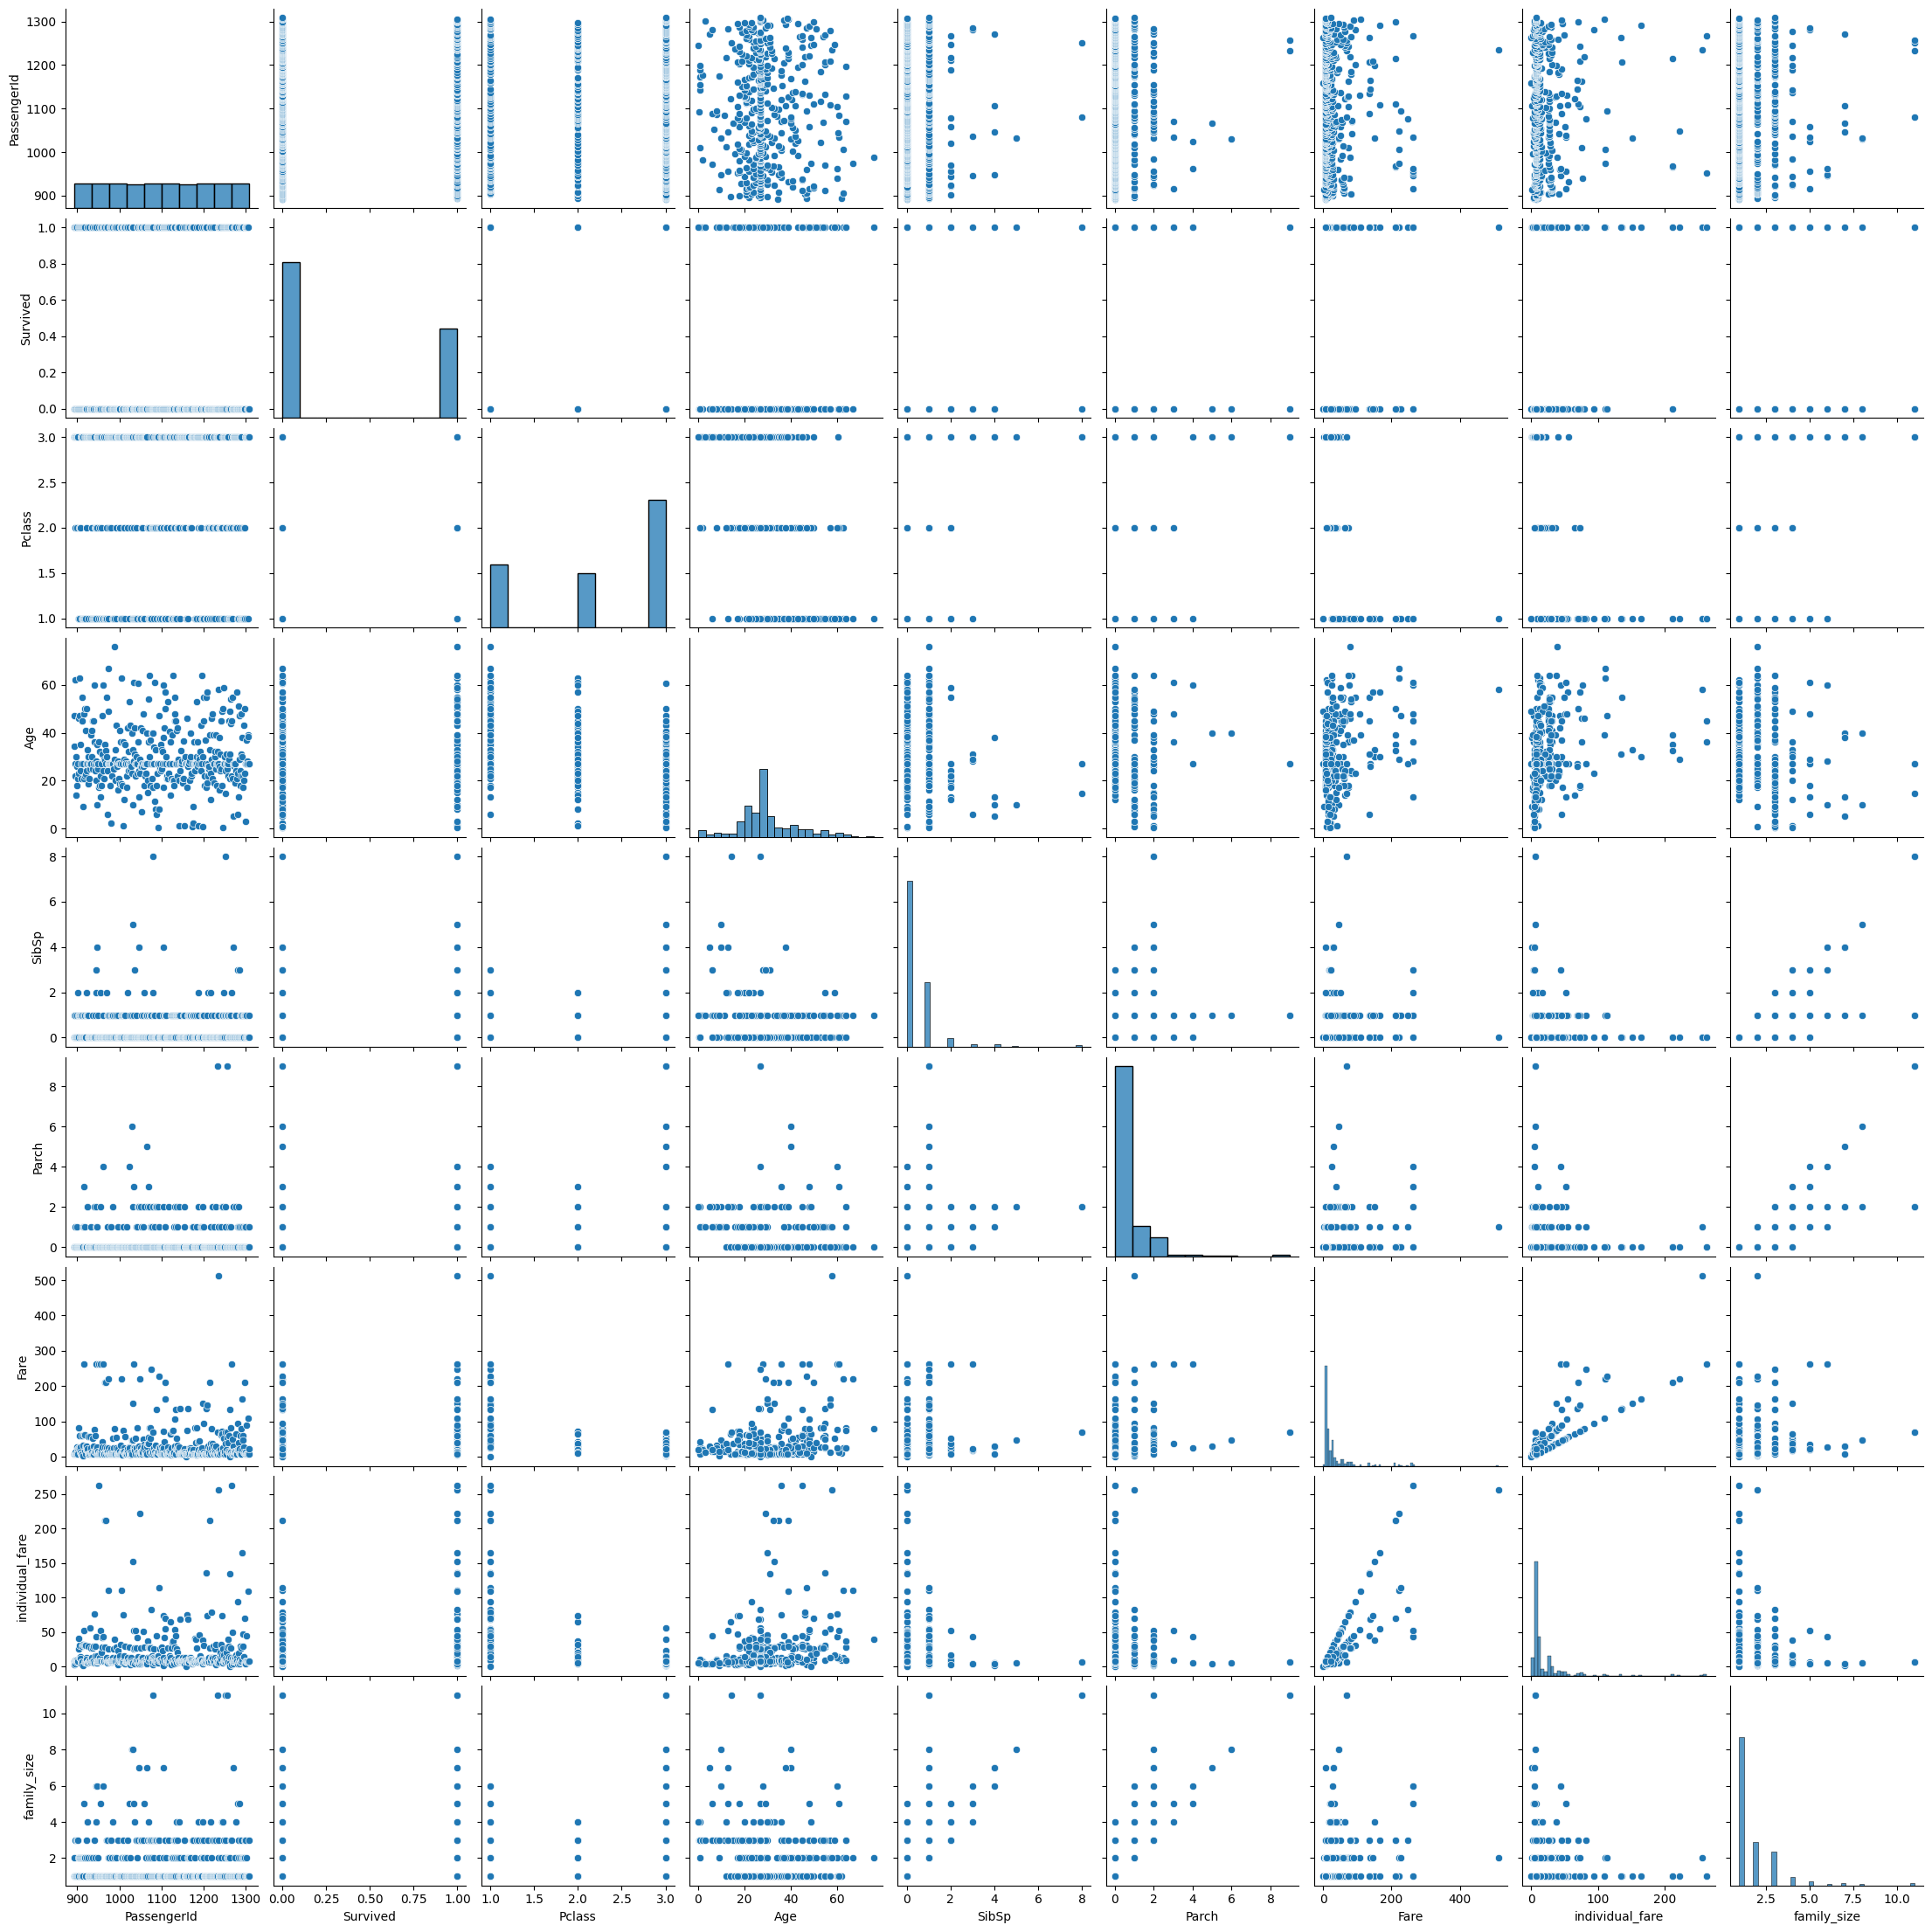

In [77]:
sns.pairplot(df)

# This Data set is like a puzzle.

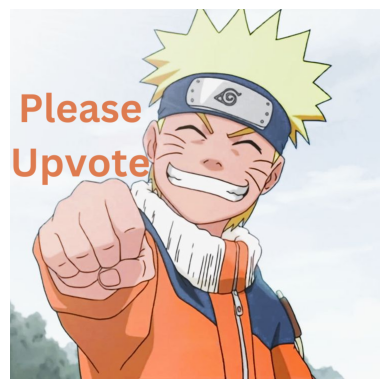

In [78]:
from PIL import Image
image = Image.open('/kaggle/input/naruto/Please Upvote.png')  
plt.imshow(image)
plt.axis('off') 
plt.show()
